In [23]:
%ls data

coupon150720.csv  sales_segments.csv.gz  transm150720.csv


In [24]:
import gzip

In [25]:
fich = gzip.GzipFile('data/sales_segments.csv.gz')

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv(fich, sep='^')

In [28]:
df.head()

,rloc,departure_date_seg,booking_date,freq_flyer_flag,creator_office_id,creator_iata_number,creator_gds_code,creator_city_code,creator_lat,creator_lon,...,bookings_seg,rpk_seg,revenue_amount_seg,currency_code,fuel_surcharge_amount_seg,fuel_surcharge_currency_code,emd_count,emd_amount,emd_currency_code,total_outliers
0,59GS9Y,2013-12-21,2013-09-05,False,RUNHS3103,66200201,1A,RUN,-20.90083,55.53715,...,1,239,33.56,EUR,7.30,EUR,0,0,NaN,7.300000
1,4D87YU,2013-12-29,2013-01-29,False,RUNUU000B,66490104,UU,RUN,-20.90083,55.53715,...,5,1116,306.00,EUR,127.50,EUR,0,0,NaN,77.271017
2,7W67K8,2013-12-29,2013-02-05,False,RUNUU01A3,66490830,UU,RUN,-20.90083,55.53715,...,19,4240,1365.50,EUR,234.00,EUR,0,0,NaN,278.175661
3,3ESPWM,2013-12-29,2013-03-19,False,RUNUU010C,66490771,UU,RUN,-20.90083,55.53715,...,3,1220,81.35,EUR,39.93,EUR,0,0,NaN,32.458243
4,6ITPJM,2013-12-29,2013-05-11,False,MRSA12108,20261721,1A,MRS,43.29695,5.38107,...,2,1342,0.00,EUR,31.82,EUR,0,0,NaN,32.496507


In [29]:
df.count()

rloc                            1459121
departure_date_seg              1459121
booking_date                    1459121
freq_flyer_flag                 1459121
creator_office_id               1459121
creator_iata_number             1414716
creator_gds_code                1459121
creator_city_code               1459121
creator_lat                     1459121
creator_lon                     1459121
creator_country_code            1459103
creator_continent_code          1459121
creator_channel_code            1454248
booking_status_code             1458491
cabin_code                      1459121
booking_class_code              1459121
pos_office_id                   1455702
pos_iata_number                 1455702
pos_gds_code                    1455702
pos_city_code                   1448816
pos_lat                         1448816
pos_lon                         1448816
pos_country_code                1448798
pos_continent_code              1448816
pos_channel_code                1455216


In [30]:
df.columns

Index([u'rloc', u'departure_date_seg', u'booking_date', u'freq_flyer_flag',
       u'creator_office_id', u'creator_iata_number', u'creator_gds_code',
       u'creator_city_code', u'creator_lat', u'creator_lon',
       u'creator_country_code', u'creator_continent_code',
       u'creator_channel_code', u'booking_status_code', u'cabin_code',
       u'booking_class_code', u'pos_office_id', u'pos_iata_number',
       u'pos_gds_code', u'pos_city_code', u'pos_lat', u'pos_lon',
       u'pos_country_code', u'pos_continent_code', u'pos_channel_code',
       u'board_point_seg', u'board_lat', u'board_lon', u'board_country_code',
       u'board_continent_code', u'off_point_seg', u'off_lat', u'off_lon',
       u'off_country_code', u'off_continent_code', u'num_legs',
       u'distance_seg', u'route', u'network', u'airline_code',
       u'flight_number', u'flight_type', u'revenue_source', u'estimated_flag',
       u'usage_board_point_seg', u'usage_off_point_seg',
       u'usage_flight_number', u'usage

### Lo primero buscaremos anomalías o outliers en los campos:

bookings_seg revenue_amount_seg y fuel_surcharge_amount_seg

In [31]:
df = df[['bookings_seg','revenue_amount_seg','fuel_surcharge_amount_seg']]
df.head()

,bookings_seg,revenue_amount_seg,fuel_surcharge_amount_seg
0,1,33.56,7.30
1,5,306.00,127.50
2,19,1365.50,234.00
3,3,81.35,39.93
4,2,0.00,31.82


In [32]:
# Buscaremos clusters con kmeans
df['revenue'] = df['revenue_amount_seg'] / df['bookings_seg']
df['tax'] = df['fuel_surcharge_amount_seg'] / df['bookings_seg']
df.head()

,bookings_seg,revenue_amount_seg,fuel_surcharge_amount_seg,revenue,tax
0,1,33.56,7.30,33.560000,7.300000
1,5,306.00,127.50,61.200000,25.500000
2,19,1365.50,234.00,71.868421,12.315789
3,3,81.35,39.93,27.116667,13.310000
4,2,0.00,31.82,0.000000,15.910000


In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
simple = df[['revenue','tax']]
simple.head()

,revenue,tax
0,33.560000,7.300000
1,61.200000,25.500000
2,71.868421,12.315789
3,27.116667,13.310000
4,0.000000,15.910000


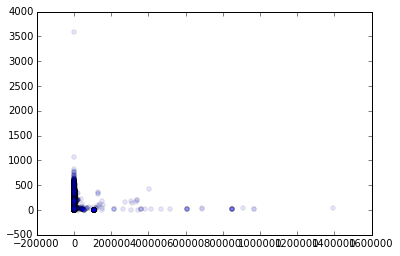

In [38]:
plt.scatter(simple['revenue'], simple['tax'],alpha=0.1)
plt.show()

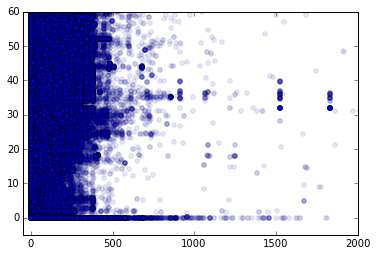

In [40]:
plt.scatter(simple['revenue'], simple['tax'], alpha=0.1)
plt.xlim(-50,2000)
plt.ylim(-5,60)
plt.show()

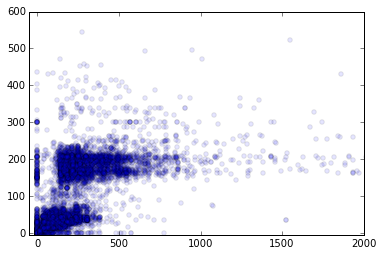

In [42]:
# quiero los gráficos menos opacos
smaller = simple.sample(10000) 
plt.scatter(smaller['revenue'], smaller['tax'], alpha=0.1)
plt.xlim(-50,2000)
plt.ylim(-5,600)
plt.show()

# Ya se ve estructura de cluster !!!!!!!!!!!!

# DECIDIRÉ SI UN VALOR ES OUTLIER SI Z-SCORE > 3

donde z es la distancia a la media en número de desviaciones estándar

In [46]:
# con kmeans es mucho más rápido que graficar

from sklearn.cluster import KMeans
import numpy as np

In [163]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(smaller)
print(clusters)
smaller.head()

[0 0 0 ..., 1 0 0]


,revenue,tax,cluster
1177486,221.85,194.90,6
1159231,264.96,38.49,5
1244124,204.20,204.10,6
1412390,161.49,176.83,6
872226,46.40,16.49,7


In [164]:
# Calculamos el z-score

smaller['cluster'] = clusters

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [165]:
groups = smaller.groupby(['cluster'])
means = groups.mean()
stdevs = groups.std()
print (means)
print (stdevs)

            revenue         tax
cluster                        
0        133.498989   76.330249
1        634.123063  196.752188
            revenue        tax
cluster                       
0         94.436272  77.967428
1        334.572889  55.022156


In [166]:
# Voy a hacer un merge, pero tienen el mismo nombre de coliumnas
# means.columns = means.columns.map(lambda s: s + "-mean")
# stdevs.columns = stdevs.columns.map(lambda s: s + "-stdevs")
means.columns =['revenue-mean','tax-mean']
stdevs.columns =['revenue-stdev','tax-stdev']
print (means)
print (stdevs)

         revenue-mean    tax-mean
cluster                          
0          133.498989   76.330249
1          634.123063  196.752188
         revenue-stdev  tax-stdev
cluster                          
0            94.436272  77.967428
1           334.572889  55.022156


In [167]:
cluster_stats = pd.merge(means, stdevs, left_index=True, right_index=True)
cluster_stats

,revenue-mean,tax-mean,revenue-stdev,tax-stdev
cluster,,,,
0,133.498989,76.330249,94.436272,77.967428
1,634.123063,196.752188,334.572889,55.022156


In [168]:
# Calculo de z-score para cada punto (Será con un join, hago index = column)
cluster_stats = cluster_stats.reset_index()
cluster_stats

,cluster,revenue-mean,tax-mean,revenue-stdev,tax-stdev
0,0,133.498989,76.330249,94.436272,77.967428
1,1,634.123063,196.752188,334.572889,55.022156


In [169]:
merged = pd.merge(smaller,cluster_stats,left_on='cluster',right_on='cluster')
merged.sample(10)

,revenue,tax,cluster,revenue-mean,tax-mean,revenue-stdev,tax-stdev
5427,22.99,4.05,0,133.498989,76.330249,94.436272,77.967428
1616,118.90,34.17,0,133.498989,76.330249,94.436272,77.967428
8172,99.00,19.89,0,133.498989,76.330249,94.436272,77.967428
7098,305.99,56.75,0,133.498989,76.330249,94.436272,77.967428
5818,251.99,195.67,0,133.498989,76.330249,94.436272,77.967428
5769,219.50,166.72,0,133.498989,76.330249,94.436272,77.967428
7828,145.87,221.08,0,133.498989,76.330249,94.436272,77.967428
2066,369.50,162.82,0,133.498989,76.330249,94.436272,77.967428
8463,112.37,24.49,0,133.498989,76.330249,94.436272,77.967428
9032,446.47,144.48,1,634.123063,196.752188,334.572889,55.022156


In [170]:
def is_outlier(row):
    z_rev = (row['revenue'] - row['revenue-mean']) / row['revenue-stdev']
    z_tax = (row['tax'] - row['tax-mean']) / row['tax-stdev']
    z = sqrt(z_rev**2 + z_tax**2)
    return z > 3
outlier = merged.apply(is_outlier, axis=1)
outlier.sum()  # CANTIDAD DE OULIERS

166

In [171]:
merged['outlier'] = outlier
merged.sample(10)

,revenue,tax,cluster,revenue-mean,tax-mean,revenue-stdev,tax-stdev,outlier
6643,34.583333,27.43,0,133.498989,76.330249,94.436272,77.967428,False
5997,305.940000,145.30,0,133.498989,76.330249,94.436272,77.967428,False
6619,308.500000,161.37,0,133.498989,76.330249,94.436272,77.967428,False
4242,0.000000,43.78,0,133.498989,76.330249,94.436272,77.967428,False
9705,950.000000,179.55,1,634.123063,196.752188,334.572889,55.022156,False
6591,179.580000,118.83,0,133.498989,76.330249,94.436272,77.967428,False
8011,272.997500,159.21,0,133.498989,76.330249,94.436272,77.967428,False
3076,99.000000,13.85,0,133.498989,76.330249,94.436272,77.967428,False
3878,155.000000,16.62,0,133.498989,76.330249,94.436272,77.967428,False
8469,352.000000,53.10,0,133.498989,76.330249,94.436272,77.967428,False


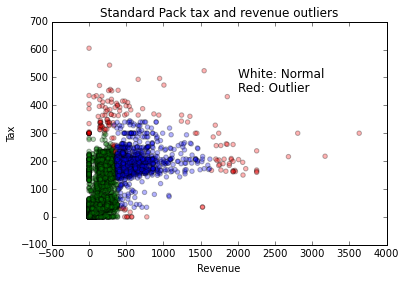

In [182]:
# Voy a pintar

merged['coloutlier'] = 'green'
merged.ix[merged.cluster == 1, ['coloutlier']] = 'blue'
merged.ix[merged.outlier == True, ['coloutlier']] = 'red'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Standard Pack tax and revenue outliers")
ax.set_xlabel("Revenue")
ax.set_ylabel("Tax")
xval = 2000
yval = 500
lineheight = 50
ax.text(xval, yval, 'White: Normal', fontsize=12)
ax.text(xval, yval - lineheight, 'Red: Outlier', fontsize=12)

#plt.x_title = "Revenue"
plt.scatter(merged.revenue, merged.tax, c=merged.coloutlier, alpha=0.3)

plt.show()

### PASADO A LIMPIO  y con 10 grupos 

In [99]:
x = smaller['revenue'].values
y = smaller['tax'].values

In [62]:
xydata = np.asarray(zip(x, y))
xydata

array([[ 221.85,  194.9 ],
       [ 264.96,   38.49],
       [ 204.2 ,  204.1 ],
       ..., 
       [ 376.77,  183.64],
       [ 243.99,   40.69],
       [ 133.85,   29.76]])

In [51]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(xydata)

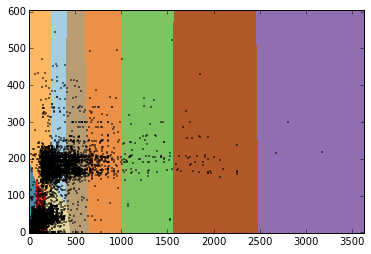

In [52]:
# Plotting from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = np.asarray(x).min() - 1, np.asarray(x).max() + 1
y_min, y_max = np.asarray(y).min() - 1, np.asarray(y).max() + 1
h = np.asarray([x_max-x_min, y_max-y_min]).max()/1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.plot(x, y, 'k.', markersize=2)
plt.show()


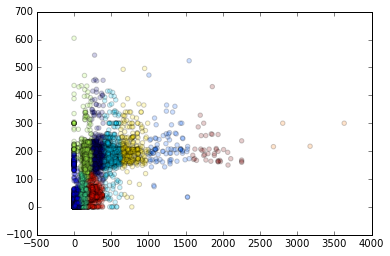

In [53]:
_ = plt.scatter(x, y, c=clusters, alpha=0.2)

In [54]:
df = pd.DataFrame({"revenue": x, "tax": y, "cluster": clusters})
df.head()

,cluster,revenue,tax
0,5,221.85,194.90
1,8,264.96,38.49
2,5,204.20,204.10
3,5,161.49,176.83
4,1,46.40,16.49


In [55]:
means = df.groupby('cluster').mean()
# Relabel columns
means = pd.DataFrame({'cluster_rev_mean': means['revenue'], 'cluster_tax_mean': means['tax']})
# And add the cluster as a column, not the index
#stds['Cluster'] = stds.index

stds = df.groupby('cluster').std()
# Relabel columns
stds = pd.DataFrame({'cluster_rev_std': stds['revenue'], 'cluster_tax_std': stds['tax']})
#stds['Cluster'] = stds.index

stats = means.join(stds)
stats

,cluster_rev_mean,cluster_tax_mean,cluster_rev_std,cluster_tax_std
cluster,,,,
0,306.941194,188.642017,47.348480,42.869441
1,41.725793,22.774534,25.098744,28.136451
2,1244.275000,216.194353,165.783295,73.699587
3,495.055193,188.148282,60.405034,50.695093
4,119.453682,34.236886,28.292073,17.979604
5,173.909004,186.361177,46.027353,39.751931
6,764.061503,208.134117,94.550538,57.252650
7,3072.125000,258.357500,427.213525,48.088465
8,254.308786,43.871234,45.288514,20.665622


In [56]:
df_wstats = pd.merge(df, stats, left_on='cluster', right_index=True)
df_wstats.tail(5)

,cluster,revenue,tax,cluster_rev_mean,cluster_tax_mean,cluster_rev_std,cluster_tax_std
9315,9,1856.41,260.03,1868.356341,207.693171,182.786126,55.648651
9400,9,1936.00,199.09,1868.356341,207.693171,182.786126,55.648651
9799,9,2069.50,150.00,1868.356341,207.693171,182.786126,55.648651
9886,9,1936.00,161.37,1868.356341,207.693171,182.786126,55.648651
9908,9,1936.00,162.82,1868.356341,207.693171,182.786126,55.648651


In [57]:
df_wstats['z_rev'] = (df_wstats.revenue - df_wstats.cluster_rev_mean)/df_wstats.cluster_rev_std
df_wstats['z_tax'] = (df_wstats.tax - df_wstats.cluster_tax_mean)/df_wstats.cluster_tax_std
df_wstats['z'] = np.sqrt(df_wstats.z_rev*df_wstats.z_rev + df_wstats.z_tax*df_wstats.z_tax)
df_wstats.head()

,cluster,revenue,tax,cluster_rev_mean,cluster_tax_mean,cluster_rev_std,cluster_tax_std,z_rev,z_tax,z
0,5,221.85,194.90,173.909004,186.361177,46.027353,39.751931,1.041576,0.214803,1.063495
2,5,204.20,204.10,173.909004,186.361177,46.027353,39.751931,0.658109,0.446238,0.795132
3,5,161.49,176.83,173.909004,186.361177,46.027353,39.751931,-0.269818,-0.239766,0.360957
12,5,231.81,187.00,173.909004,186.361177,46.027353,39.751931,1.257969,0.016070,1.258072
40,5,188.92,200.38,173.909004,186.361177,46.027353,39.751931,0.326132,0.352658,0.480343


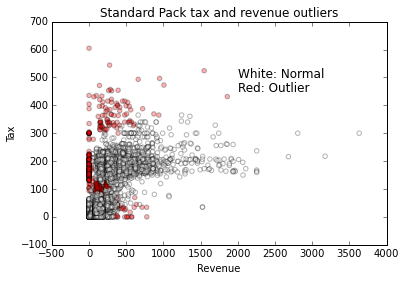

In [143]:
# Create a "boolean" outlier column
df_wstats['outlier'] = 'white'
df_wstats.ix[df_wstats.z > 3, ['outlier']] = 'red'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Standard Pack tax and revenue outliers")
ax.set_xlabel("Revenue")
ax.set_ylabel("Tax")
xval = 2000
yval = 500
lineheight = 50
ax.text(xval, yval, 'White: Normal', fontsize=12)
ax.text(xval, yval - lineheight, 'Red: Outlier', fontsize=12)

#plt.x_title = "Revenue"
plt.scatter(df_wstats.revenue, df_wstats.tax, c=df_wstats.outlier, alpha=0.3)

plt.show()